In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
#reading data
data = pd.read_csv("data.csv")
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
#extracting required data (data exploration). We have just taken the first 2000 players from data
#data cleaning
req_fields = ['Overall', 'Potential', 'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

#goalkeepers didnt have values for LS,ST,RS,CB etc
data = data.fillna(0)

#We have just taken the first 2000 players from data
data = data.iloc[0:2000,:]

#data is in the form of range. converting it into integer values
def formulaCalculation(row):
    return eval(str(row[feature]))

for feature in req_fields:
    data[feature] = data.apply(formulaCalculation, axis=1)


req_data = data[req_fields]

req_data

,Overall,Potential,LS,ST,RS,LW,LF,CF,RF,RW,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,94,94,90,90,90,94,95,95,95,94,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94,94,94,94,94,92,93,93,93,92,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,92,93,87,87,87,92,92,92,92,92,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,91,93,0,0,0,0,0,0,0,0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,91,92,85,85,85,90,90,90,90,90,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,75,82,76,76,76,76,76,76,76,76,...,66.0,77.0,41.0,33.0,22.0,11.0,14.0,14.0,11.0,8.0
1996,75,75,58,58,58,56,57,57,57,56,...,69.0,75.0,75.0,77.0,74.0,15.0,12.0,8.0,12.0,11.0
1997,75,82,75,75,75,76,76,76,76,76,...,65.0,68.0,26.0,21.0,25.0,9.0,7.0,6.0,10.0,9.0
1998,75,75,71,71,71,76,75,75,75,76,...,72.0,76.0,58.0,60.0,56.0,11.0,8.0,5.0,10.0,11.0


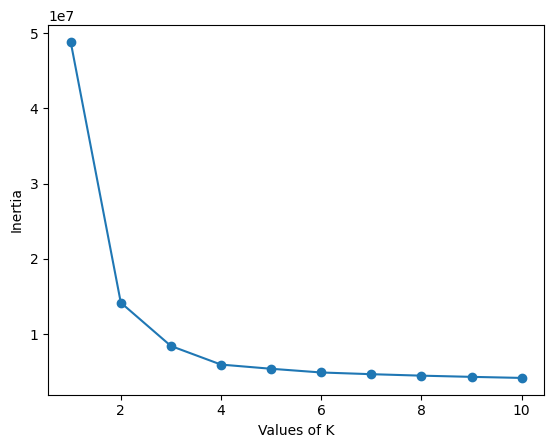

In [4]:
#checking how many clusters should the data be divided into. We are using elbow method
sse = []
iter = [1,2,3,4,5,6,7,8,9,10]
for i in iter:
    km = KMeans(n_clusters=i, n_init=10, max_iter=1000)
    km.fit_predict(req_data)
    sse.append(km.inertia_)
plt.xlabel("Values of K")
plt.ylabel("Inertia")
plt.plot(iter, sse, '-o')

In [5]:
#applying kmeans for 4 clusters since 4 is the optimum number of clusters from the above graph
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=1000, 
    tol=1e-04, random_state=0
)

#predicting kmeans and clustering on req_data
y_km = km.fit_predict(req_data)

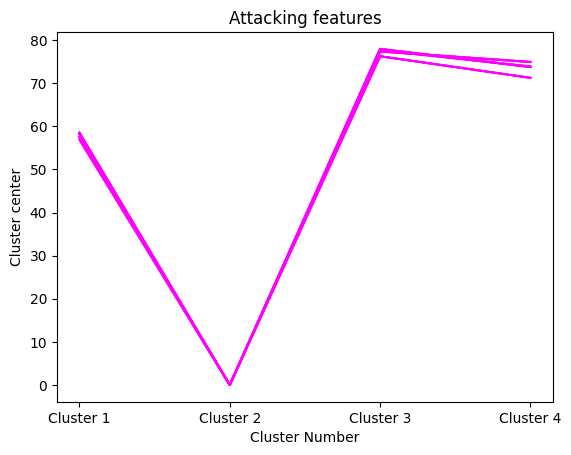

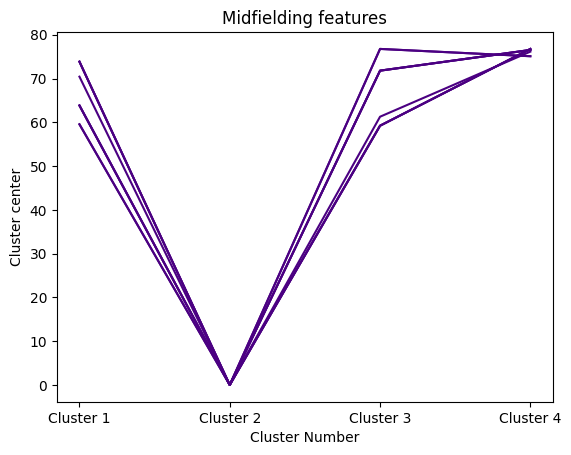

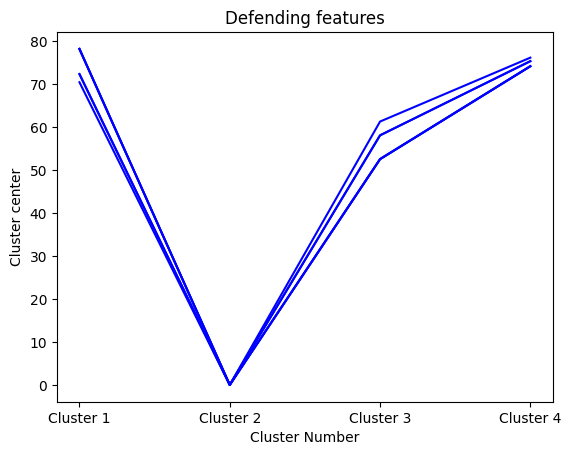

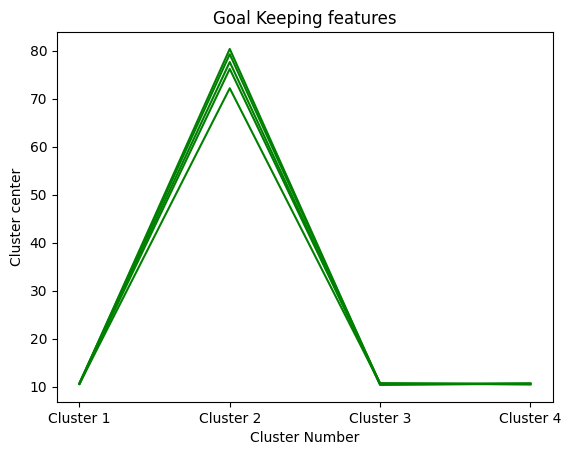

In [6]:
# Analyzing clusters based on the player features.
#plotting different clusters according to their roles
clusters = []
for i in range(4):
   clusters.append('Cluster ' + str(i+1))

for i in range(2,13):
   plt.plot(clusters, km.cluster_centers_[:,i], color='magenta')
plt.xlabel('Cluster Number')
plt.ylabel('Cluster center')
plt.title('Attacking features')
plt.show()



for i in range(13,22):
   plt.plot(clusters, km.cluster_centers_[:,i], color='indigo')
plt.xlabel('Cluster Number')
plt.ylabel('Cluster center')
plt.title('Midfielding features')
plt.show()


for i in range(22, 28):
   plt.plot(clusters, km.cluster_centers_[:,i], color='blue')
plt.xlabel('Cluster Number')
plt.ylabel('Cluster center')
plt.title('Defending features')
plt.show()


#Goal Keeping
for i in range(-1,-6, -1):
   plt.plot(clusters, km.cluster_centers_[:,i], color='green')

plt.xlabel('Cluster Number')
plt.ylabel('Cluster center')
plt.title('Goal Keeping features')
plt.show()

In [7]:
#getting the cluster-wise playesrs for analysis of each cluster
mydict = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}


In [8]:
# official name of a player to be replaced.
player_to_be_replaced = 'Cristiano Ronaldo'

In [9]:
#getting all the players from the same cluster
#assume we want the best replacement for Cristiano Ronaldo

#Have to specify the name in the below line for the player to be replaced.
#Also the name should exactly match the one in the csv original data file.


def player_replacement(player_to_be_replaced, req_data, data):

    players_location = req_data.loc[data['Name'] == player_to_be_replaced]
    player_number = players_location.index.values[0]
    req_cluster = km.labels_[player_number]
    player_ovl = req_data.iloc[player_number, 0]
    player_team = data.iloc[player_number,9]
    player_dist_from_centroid = km.transform(req_data)[player_number,km.labels_[player_number]]
    
    #get all players from the above cluster
    dictlist = []

    for key, value in mydict.items():
        j=0
        player_names = []
        for i in value:
            if(player_number == i):
                k = j
            player_names.append(data.iloc[i,2])
            j = j+1
        temp = [key, player_names]
        dictlist.append(temp)

    #getting data of required cluster
    req_cluster_data = []
    for i in range(req_data.iloc[:,1].size):
        if km.labels_[i] == req_cluster:
            req_cluster_data.append(i)

    data_clus_req = []
    for i in req_cluster_data:
        data_clus_req.append(data.loc[i,['Name', 'Club', 'Contract Valid Until', 'Overall', 'Potential', 'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']])
    data_clus_req = pd.DataFrame(data_clus_req, columns=['Name', 'Club', 'Contract Valid Until', 'Overall', 'Potential', 'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'])


    #taking care of NaN values
    data_clus_req = data_clus_req.fillna(0)
    #data_clus_req

    #Apply k-nearest neighbour to find the closest player as a replacement in the same cluster
    knn = NearestNeighbors(n_neighbors=8)
    knn.fit(data_clus_req.iloc[:,3:64])

    #get the replacement
    player_index = k
    replacements = []
    nearest_neighbors = knn.kneighbors(data_clus_req.iloc[player_index:player_index+1,3:64], return_distance=False)
    for i in nearest_neighbors:
        
        for j in i:
            if(data_clus_req.iloc[j,0] != data_clus_req.iloc[player_index,0]):
                replacements.append(data_clus_req.iloc[j,0:3])
    replacements = pd.DataFrame(replacements, columns=['Name', 'Club', 'Contract Valid Until'])
    return replacements

In [10]:
# sample player recommendation for a player
replacements = player_replacement(player_to_be_replaced, req_data, data)
print("Following players are the potential replacements of "+player_to_be_replaced)
replacements

Following players are the potential replacements of Cristiano Ronaldo


,Name,Club,Contract Valid Until
25,K. Mbappé,Paris Saint-Germain,2022
23,S. Agüero,Manchester City,2021
10,R. Lewandowski,FC Bayern München,2021
15,P. Dybala,Juventus,2022
17,A. Griezmann,Atlético Madrid,2023
33,P. Aubameyang,Arsenal,2021
122,F. Thauvin,Olympique de Marseille,2021


In [11]:
#reading the evaluation set that was collected from different people
evaluation_set = pd.read_csv("evaluation_set.csv")
evaluation_set

,Transferred player,Replacement
0,Cristiano Ronaldo,P. Dybala
1,Neymar Jr,E. Hazard
2,P. Dybala,A. Griezmann
3,T. Courtois,G. Buffon
4,S. Umtiti,David Luiz
5,K. Benzema,Iago Aspas
6,Thiago Silva,Sergio Ramos
7,H. Kane,R. Lewandowski
8,R. Lewandowski,H. Kane
9,G. Chiellini,Pepe


In [12]:
#running the player replacement model for the players in evaluation set
# if the player in the replacement model and the evaluation set match, we say that it correctly predicted.
#checking for the efficiency of the model
count_true = 0
count_total = 0
predict = []
actual = []
for player_test in evaluation_set.iterrows():
    replacements = player_replacement(player_test[1]['Transferred player'], req_data, data)
    actual.append(1)
    if(player_test[1]['Replacement'] in replacements.Name.values):
        count_true+=1
        count_total+=1
        predict.append(1)
    else:
        count_total+=1
        predict.append(0)

efficiency = (count_true/count_total)*100

print('The efficiency of this prediction is : ',efficiency)


The efficiency of this prediction is :  66.66666666666666


Accuracy Score:  66.66666666666666
True Positive Rate: 0.6666666666666666
True Negative Rate : nan


/var/folders/t4/5rn1r7053p5d2wgn7kbrg2vr0000gn/T/ipykernel_13069/507087557.py:13: RuntimeWarning: invalid value encountered in double_scalars
  TNR = TN/(TN+FP)


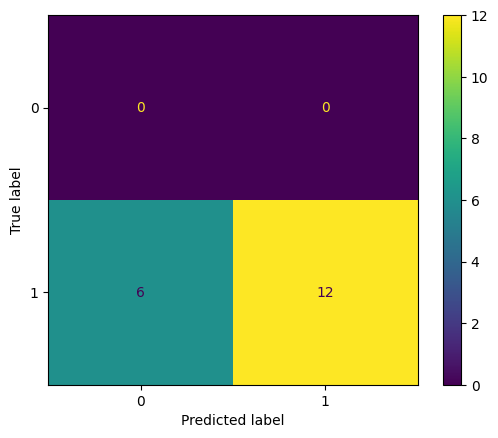

In [13]:
accuracyScore = accuracy_score(actual, predict)

print("Accuracy Score: ", accuracyScore*100)
cm = confusion_matrix(actual, predict)
FP = cm[0][1].astype(float)     
FN = cm[1][0].astype(float)
TP = cm[1][1].astype(float)
TN = cm[0][0].astype(float) 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
#  true negative rate
TNR = TN/(TN+FP) 
print('True Positive Rate:', TPR)
print('True Negative Rate :', TNR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()